In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve



In [12]:
df = pd.read_csv('exams.csv')

In Naive Bayes, all varialbes must be discrete functions. Since the scores are continous variables, it is neccesary to bin the results into sets. This set will be based on a fail(0-54) or pass(55-100). An average score will be added to test the overall effectiveness of the preperation test. If a student average is over 55%, it will be considered a pass.

In [13]:
labels = ['fail','pass']
bins = [0,55,101]
df['average score'] = (df['math score'] + df['writing score']+df['reading score'])/3
df['math score'] = pd.cut(df['math score'],bins = bins, labels = labels, include_lowest = True)
df['reading score'] = pd.cut(df['reading score'],bins = bins, labels = labels, include_lowest = True)
df['writing score'] = pd.cut(df['writing score'],bins = bins, labels = labels, include_lowest = True)
df['average score'] = pd.cut(df['average score'],bins = bins, labels = labels, include_lowest = True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,male,group A,high school,standard,completed,pass,pass,pass,pass
1,female,group D,some high school,free/reduced,none,fail,pass,fail,fail
2,male,group E,some college,free/reduced,none,pass,pass,fail,pass
3,male,group B,high school,standard,none,pass,pass,pass,pass
4,male,group E,associate's degree,standard,completed,pass,pass,pass,pass


In [14]:
le = preprocessing.LabelEncoder()
for col in df.columns:
        df[col] = le.fit_transform(df[col])
        
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,1,0,2,1,0,1,1,1,1
1,0,3,5,0,1,0,1,0,0
2,1,4,4,0,1,1,1,0,1
3,1,1,2,1,1,1,1,1,1
4,1,4,0,1,0,1,1,1,1


Values are now encoded and ready to be used in GaussianNB

## Cross validation

Split the data into the factors and target. Dataset is further split into a training and dataset with a 7:3 ratio

In [15]:
factors = df.iloc[:,0:5]
target = df.iloc[:,5:9]
X_train, X_test, y_train, y_test = train_test_split(
   factors, target, test_size = 0.3, random_state = 1
)


## Training and Testing

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train['average score'])
y_pred_average = gnb.predict(X_test)
print("Accuracy score is : ",metrics.accuracy_score(y_test['average score'], y_pred_average))

Accuracy score is :  0.8066666666666666


The classifer was able to predict the outcome with an accuracy of 0.807

## Evaluation

In [7]:
confusion_matrix(y_test['average score'], y_pred_average,labels=None, sample_weight=None, normalize=None)

array([[ 20,  44],
       [ 14, 222]], dtype=int64)

Naive bayes classifier has tp value of 20, fp of 14, fn of 44 and tn of 222

In [8]:
print(classification_report(y_test['average score'], y_pred_average))

              precision    recall  f1-score   support

           0       0.59      0.31      0.41        64
           1       0.83      0.94      0.88       236

    accuracy                           0.81       300
   macro avg       0.71      0.63      0.65       300
weighted avg       0.78      0.81      0.78       300



Precision score of 0.83, recall 0.94, and a f1 score of 0.88

In [9]:
precision, recall, thresholds = precision_recall_curve(y_test['average score'], y_pred_average)

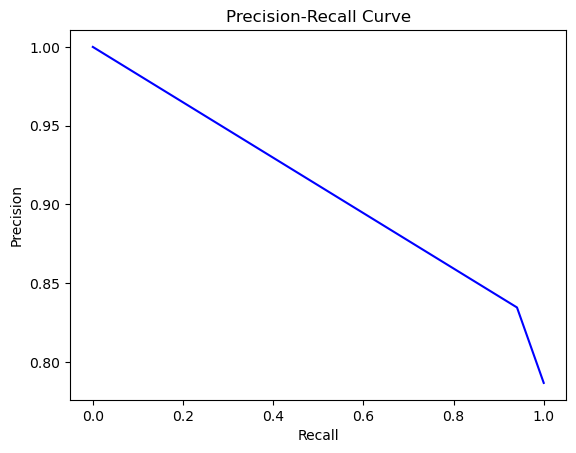

In [10]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color= 'blue')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()